In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy

import pickle

# from google.colab import drive
# drive.mount('/content/gdrive')
print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

/content
Covid_19_predictor already Exists


In [2]:
if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

/content/Covid_19_predictor
Already up to date.


In [3]:
df=pd.read_csv("data.csv")
df.head()

dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
0  05/06/2020    5      6  ...                   AFG   37172386.0          Asia
1  04/06/2020    4      6  ...                   AFG   37172386.0          Asia
2  03/06/2020    3      6  ...                   AFG   37172386.0          Asia
3  02/06/2020    2      6  ...                   AFG   37172386.0          Asia
4  01/06/2020    1      6  ...                   AFG   37172386.0          Asia

[5 rows x 11 columns]

In [0]:
grouped=df.groupby('countriesAndTerritories')
countries=sorted(list(set(df.countriesAndTerritories.unique())))
countries
country_population = {}
for country in countries:
  country_population[country]=set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
#for country in countries:
#    print("{0:45s}".format(country), country_population[country])


In [0]:
country_wise_cases=dict()
country_wise_deaths=dict()
normalised_country_wise_cases=dict()
normalised_country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break


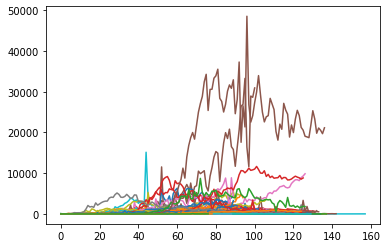

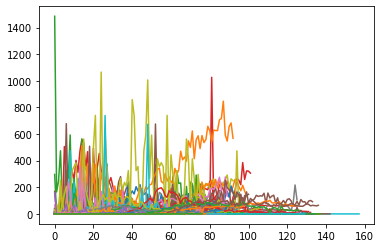

In [6]:
for country in countries:
  graph=plt.plot(country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1_000_000 / country_population[country]
  graph=plt.plot(normalised_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

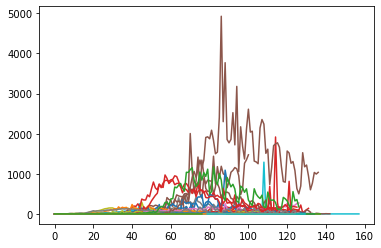

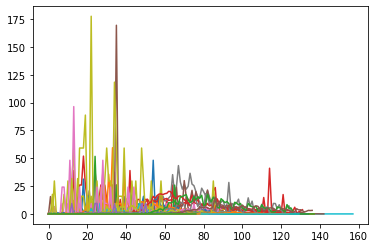

In [7]:
for country in countries:
  graph=plt.plot(country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1_000_000 / country_population[country]
  graph=plt.plot(normalised_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [0]:
cummulative_country_wise_cases=dict()
cummulative_country_wise_deaths=dict()
normalised_cummulative_country_wise_cases=dict()
normalised_cummulative_country_wise_deaths=dict()

for country in countries:
  cummulative_country_wise_cases[country] = []
  cummulative_country_wise_deaths[country] = []
  cummulative_cases = 0
  cummulative_death = 0
  normalised_cummulative_country_wise_cases[country] = []
  normalised_cummulative_country_wise_deaths[country] = []
  normalised_cummulative_cases = 0
  normalised_cummulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cummulative_cases += country_wise_cases[country][index]
    cummulative_death += country_wise_deaths[country][index]
    cummulative_country_wise_cases[country].append(cummulative_cases)
    cummulative_country_wise_deaths[country].append(cummulative_death)
    normalised_cummulative_cases += normalised_country_wise_cases[country][index]
    normalised_cummulative_death += normalised_country_wise_deaths[country][index]
    normalised_cummulative_country_wise_cases[country].append(normalised_cummulative_cases)
    normalised_cummulative_country_wise_deaths[country].append(normalised_cummulative_death)

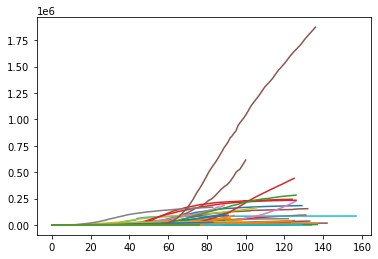

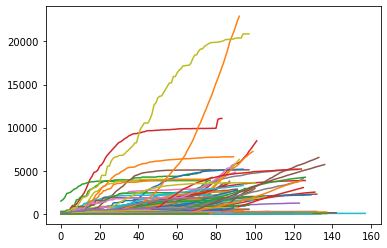

In [9]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  graph=plt.plot(normalised_cummulative_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

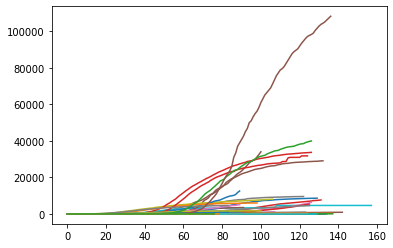

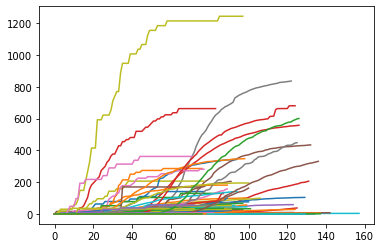

In [10]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  graph=plt.plot(normalised_cummulative_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [11]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cummulative_country_wise_cases[country][-1]),"{0:10d}".format(cummulative_country_wise_deaths[country][-1]))


Afghanistan                                        18054        300
Albania                                             1197         33
Algeria                                             9831        681
Andorra                                              852         51
Angola                                                86          4
Antigua_and_Barbuda                                   26          3
Argentina                                          19255        588
Armenia                                            11221        176
Aruba                                                101          3
Australia                                           7240        102
Austria                                            16741        670
Azerbaijan                                          6522         78
Bahamas                                              102         11
Bahrain                                            13296         21
Bangladesh                                      

In [12]:
#code to generate a list of top 15 countries with highest cummulative deaths and cases.
#generates two lists of countries which are sorted in descending order based on the cases/deaths
#adjust value of slicing to get top 10/20.
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country,cumm_cases in zip(cummulative_country_wise_cases.keys(),cummulative_country_wise_cases.values()):
  countries_and_cases.append([country,cumm_cases[-1]])
countries_and_cases=sorted(countries_and_cases,key=lambda x:x[1],reverse=True)
top_n_cases=list(map(lambda x:x[0],countries_and_cases))[:top_n]


for country,cumm_deaths in zip(cummulative_country_wise_deaths.keys(),cummulative_country_wise_deaths.values()):
  countries_and_deaths.append([country,cumm_deaths[-1]])
countries_and_deaths=sorted(countries_and_deaths,key=lambda x:x[1],reverse=True)

top_n_deaths=list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index]))


def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
training_countries = list(intersection(top_n_cases, top_n_deaths))
# training_countries.append("India")
print(training_countries) 

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
United_Kingdom                                Italy                                        
Spain                                         Spain                                        
Italy                                         France                                       
India                                         Mexico                                       
Germany                                       Belgium                                      
Peru                                          Germany                                      
Turkey                                        Iran                             

In [13]:
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

Using TensorFlow backend.


In [0]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths
# base_data_cases = country_wise_cases
# base_data_deaths = country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_cases[country]["Train"])
    a1 = np.array(data_cases[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_cases[country] = sc.fit_transform(a0)
    transform_test_cases[country] = sc.fit_transform(a1)
    scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_deaths[country]["Train"])
    a1 = np.array(data_deaths[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_deaths[country] = sc.fit_transform(a0)
    transform_test_deaths[country] = sc.fit_transform(a1)
    scaler_deaths[country] = sc
del a0
del a1

In [15]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

Spain (100, 1)
Germany (104, 1)
United_Kingdom (101, 1)
Italy (101, 1)
United_States_of_America (109, 1)
Brazil (80, 1)


Spain (25, 1)
Germany (26, 1)
United_Kingdom (26, 1)
Italy (26, 1)
United_States_of_America (28, 1)
Brazil (21, 1)


Spain (100, 1)
Germany (104, 1)
United_Kingdom (101, 1)
Italy (101, 1)
United_States_of_America (109, 1)
Brazil (80, 1)


Spain (25, 1)
Germany (26, 1)
United_Kingdom (26, 1)
Italy (26, 1)
United_States_of_America (28, 1)
Brazil (21, 1)


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_deaths[country]["y"] = y_test

In [17]:
arr_buff_cases = []
for country in training_countries:
    buff = {}
    buff["X_train"] = trainset_cases[country]["X"].shape
    buff["y_train"] = trainset_cases[country]["y"].shape
    buff["X_test"] = testset_cases[country]["X"].shape
    buff["y_test"] = testset_cases[country]["y"].shape
    arr_buff_cases.append(buff)

pd.DataFrame(arr_buff_cases, index=training_countries)

arr_buff_deaths = []
for country in training_countries:
    buff = {}
    buff["X_train"] = trainset_deaths[country]["X"].shape
    buff["y_train"] = trainset_deaths[country]["y"].shape
    buff["X_test"] = testset_deaths[country]["X"].shape
    buff["y_test"] = testset_deaths[country]["y"].shape
    arr_buff_deaths.append(buff)

pd.DataFrame(arr_buff_deaths, index=training_countries)

X_train y_train      X_test y_test
Spain                      (97, 3, 1)   (97,)  (22, 3, 1)  (22,)
Germany                   (101, 3, 1)  (101,)  (23, 3, 1)  (23,)
United_Kingdom             (98, 3, 1)   (98,)  (23, 3, 1)  (23,)
Italy                      (98, 3, 1)   (98,)  (23, 3, 1)  (23,)
United_States_of_America  (106, 3, 1)  (106,)  (25, 3, 1)  (25,)
Brazil                     (77, 3, 1)   (77,)  (18, 3, 1)  (18,)

In [0]:
total_error = dict()
model_types = ["RNN","LSTM", "GRU", "NODE"]
for model_type in model_types:
  total_error[model_type] = dict()
  total_error[model_type]["Cases"] = 0
  total_error[model_type]["Deaths"] = 0
  
def lagging(df, lag):
    df_pred = pd.Series(df["Pred"].reshape(-1))
    df_true = pd.Series(df["True"].reshape(-1))
    
    df_pred_lag = df_pred.shift(lag)
    
    # print("MSE without Lag :", mean_squared_error(np.array(df_true), np.array(df_pred)))
    MSE_lag = mean_squared_error(np.array(df_true[:-lag]), np.array(df_pred_lag[:-lag]))
    print("MSE with Lag    :", MSE_lag)

    # plt.figure(figsize=(14,4))
    # plt.title("Prediction without Lag")
    # plt.plot(df_true, color='green')
    # plt.plot(df_pred, color='blue')
    # plt.legend(["True", "Predicted"])

    plt.figure(figsize=(14,4))
    plt.title("Prediction with Lag")
    plt.plot(df_true, color='green')
    plt.plot(df_pred_lag, color='blue')
    plt.legend(["True", "Predicted"])

    return MSE_lag


Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 9ms/step - loss: 0.4214
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 802us/step - loss: 0.3320
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 897us/step - loss: 0.2138
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 802us/step - loss: 0.1740
Fitting to United_States_of_America
Epoch 1/1
106/106 [==============================] - 0s 759us/step - loss: 0.1464
Fitting to Brazil
Epoch 1/1
77/77 [==============================] - 0s 802us/step - loss: 0.1192
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 942us/step - loss: 0.2476
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 1ms/step - loss: 0.2545
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 1ms/step - loss: 0.1129
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 895us/step - l

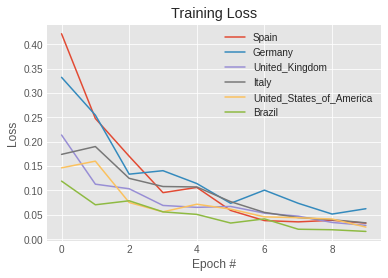

In [19]:
%%time
epochs = 10
# The RNN architecture
regressorRNN_cases = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN_cases.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back_cases,1)))
regressorRNN_cases.add(Dropout(0.2))
# Second RNN layer
regressorRNN_cases.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_cases.add(Dropout(0.2))
# Third RNN layer
regressorRNN_cases.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_cases.add(Dropout(0.5))
# Fourth RNN layer
regressorRNN_cases.add(SimpleRNN(units=50))
regressorRNN_cases.add(Dropout(0.5))
# The output layer
regressorRNN_cases.add(Dense(units=1))

# Compiling the RNN
regressorRNN_cases.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorRNN_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 6ms/step - loss: 0.5924
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 875us/step - loss: 0.4632
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 921us/step - loss: 0.3708
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 865us/step - loss: 0.3658
Fitting to United_States_of_America
Epoch 1/1
106/106 [==============================] - 0s 855us/step - loss: 0.1001
Fitting to Brazil
Epoch 1/1
77/77 [==============================] - 0s 937us/step - loss: 0.1394
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 824us/step - loss: 0.2427
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 815us/step - loss: 0.1973
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 955us/step - loss: 0.1967
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 861us/step

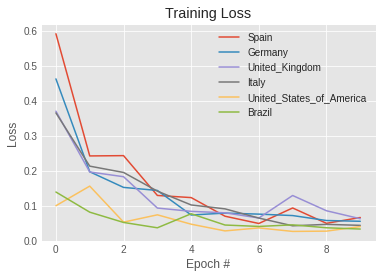

In [20]:
%%time
# epochs = 5
# The RNN architecture
regressorRNN_deaths = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN_deaths.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back_deaths,1)))
regressorRNN_deaths.add(Dropout(0.2))
# Second RNN layer
regressorRNN_deaths.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_deaths.add(Dropout(0.2))
# Third RNN layer
regressorRNN_deaths.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_deaths.add(Dropout(0.5))
# Fourth RNN layer
regressorRNN_deaths.add(SimpleRNN(units=50))
regressorRNN_deaths.add(Dropout(0.5))
# The output layer
regressorRNN_deaths.add(Dense(units=1))

# Compiling the RNN
regressorRNN_deaths.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorRNN_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressorRNN_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressorRNN_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 1.4100460022596895
MSE with Lag    : 0.6465346896032834
MSE with Lag    : 14.727651553241914
MSE with Lag    : 1.495644760469867
MSE with Lag    : 48.86050325695581
MSE with Lag    : 197.5819551161675


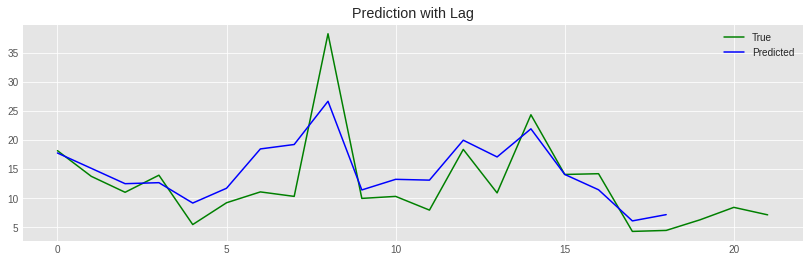

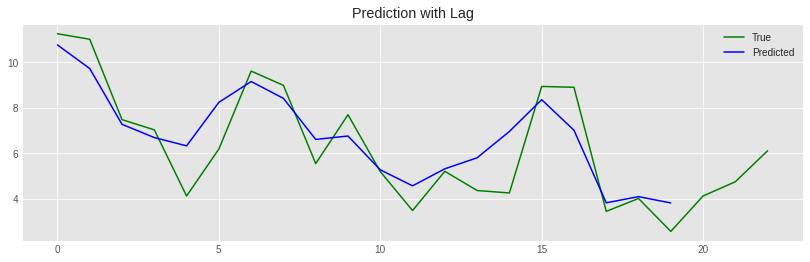

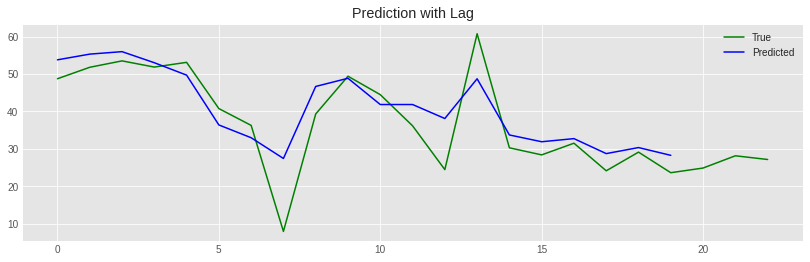

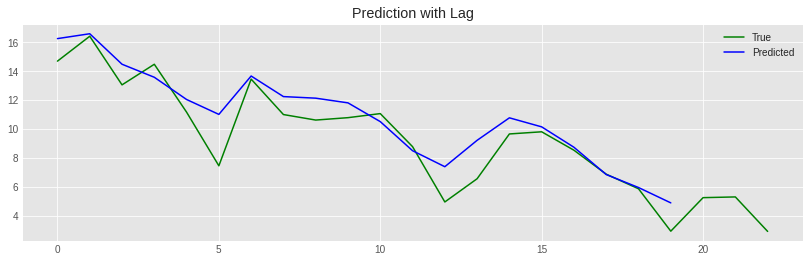

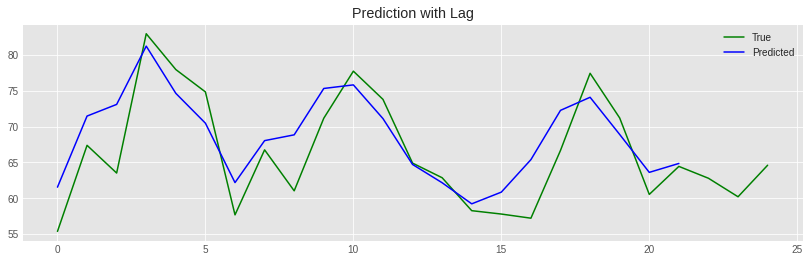

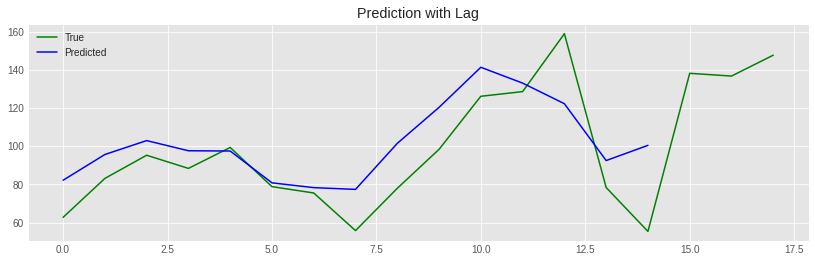

In [22]:
total_error["RNN"]["Cases"] = 0
for country in training_countries:
  total_error["RNN"]["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 0.4779016182866236
MSE with Lag    : 0.0448390384914474
MSE with Lag    : 0.17289322200392218
MSE with Lag    : 0.39437684232306625
MSE with Lag    : 0.2961515991442403
MSE with Lag    : 0.43919878526505784


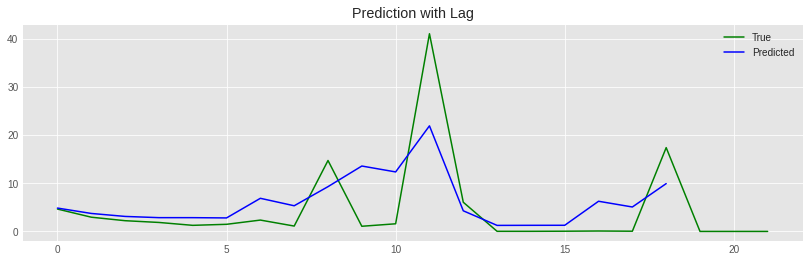

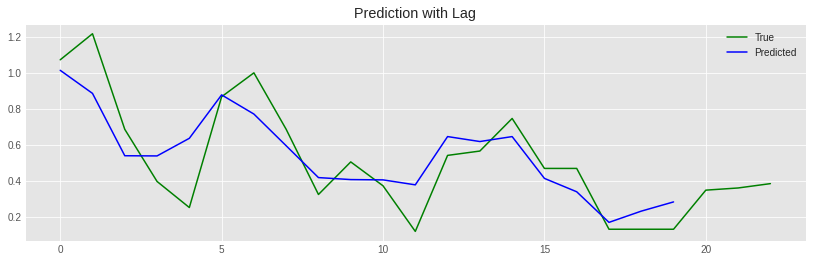

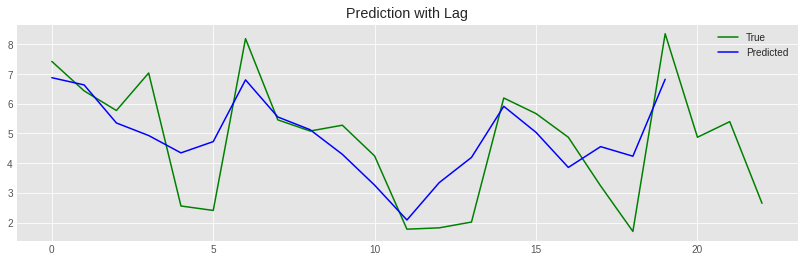

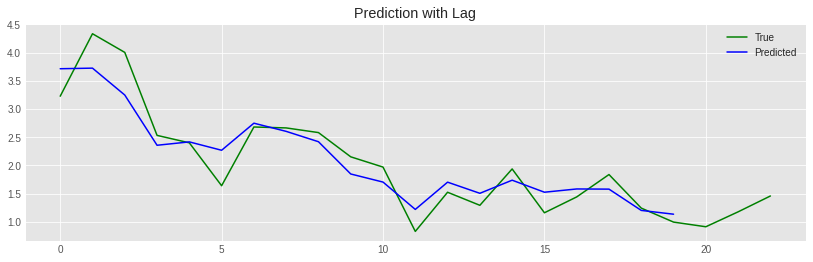

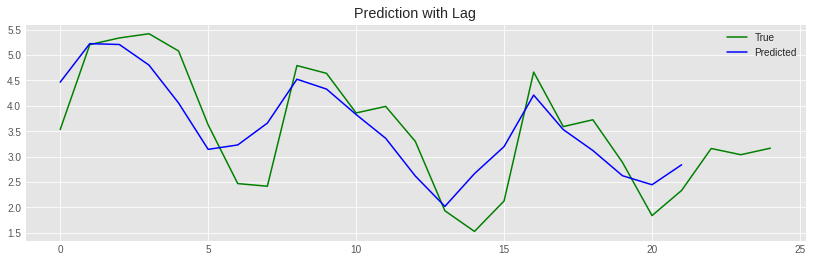

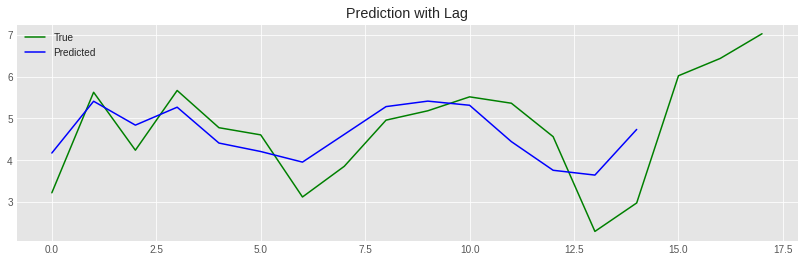

In [23]:
total_error["RNN"]["Deaths"] = 0
for country in training_countries:
  total_error["RNN"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [0]:
FILE = open('RNNcases.pickle', 'wb')
pickle.dump(regressorRNN_cases, FILE)
FILE.close()

FILE = open('RNNdeaths.pickle', 'wb')
pickle.dump(regressorRNN_deaths, FILE)
FILE.close()

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 12ms/step - loss: 0.1252
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 2ms/step - loss: 0.0912
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0475
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 3ms/step - loss: 0.0336
Fitting to United_States_of_America
Epoch 1/1
106/106 [==============================] - 0s 2ms/step - loss: 0.0276
Fitting to Brazil
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0158
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0199
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 2ms/step - loss: 0.0381
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0209
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0275
F

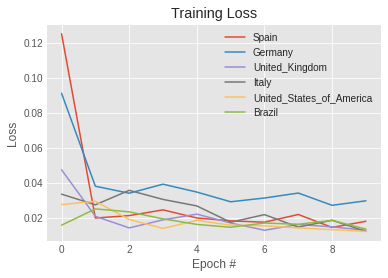

In [25]:
%%time
epochs = 10
# The LSTM architecture
regressor_cases = Sequential()
# First LSTM layer with Dropout regularisation
regressor_cases.add(LSTM(units=50, return_sequences=True, input_shape=(look_back_cases,1)))
regressor_cases.add(Dropout(0.2))
# Second LSTM layer
regressor_cases.add(LSTM(units=50, return_sequences=True))
regressor_cases.add(Dropout(0.2))
# Third LSTM layer
regressor_cases.add(LSTM(units=50, return_sequences=True))
regressor_cases.add(Dropout(0.5))
# Fourth LSTM layer
regressor_cases.add(LSTM(units=50))
regressor_cases.add(Dropout(0.5))
# The output layer
regressor_cases.add(Dense(units=1))

# Compiling the RNN
regressor_cases.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressor_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1665
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 2ms/step - loss: 0.0892
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0728
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0349
Fitting to United_States_of_America
Epoch 1/1
106/106 [==============================] - 0s 2ms/step - loss: 0.0212
Fitting to Brazil
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0438
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0304
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 2ms/step - loss: 0.0375
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0413
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0289
F

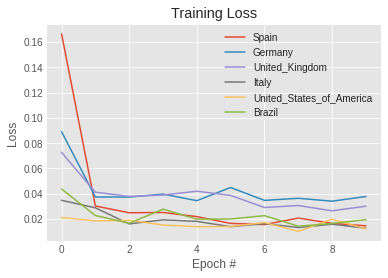

In [26]:
%%time
# epochs = 5
# The LSTM architecture
regressor_deaths = Sequential()
# First LSTM layer with Dropout regularisation
regressor_deaths.add(LSTM(units=50, return_sequences=True, input_shape=(look_back_deaths,1)))
regressor_deaths.add(Dropout(0.2))
# Second LSTM layer
regressor_deaths.add(LSTM(units=50, return_sequences=True))
regressor_deaths.add(Dropout(0.2))
# Third LSTM layer
regressor_deaths.add(LSTM(units=50, return_sequences=True))
regressor_deaths.add(Dropout(0.5))
# Fourth LSTM layer
regressor_deaths.add(LSTM(units=50))
regressor_deaths.add(Dropout(0.5))
# The output layer
regressor_deaths.add(Dense(units=1))

# Compiling the RNN
regressor_deaths.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressor_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressor_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressor_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 1.4097983247579278
MSE with Lag    : 0.6912247338736486
MSE with Lag    : 0.9754343205670465
MSE with Lag    : 0.9764208009759386
MSE with Lag    : 26.477911804879156
MSE with Lag    : 101.16252278521779


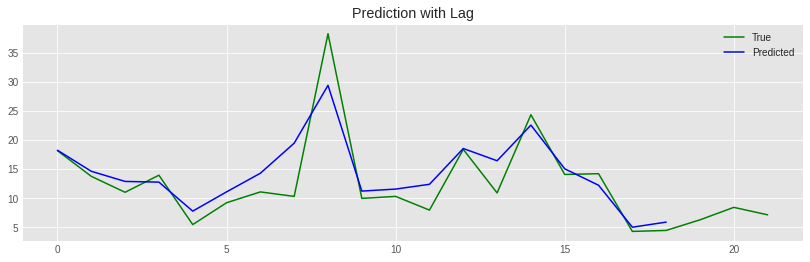

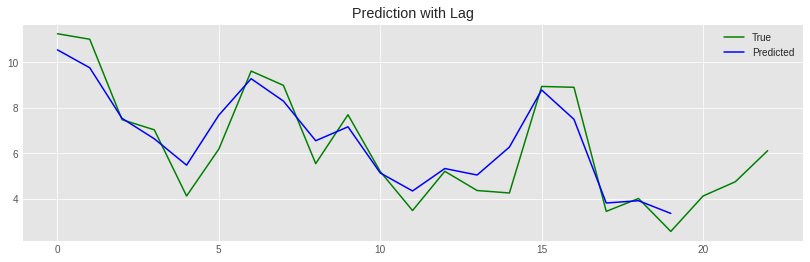

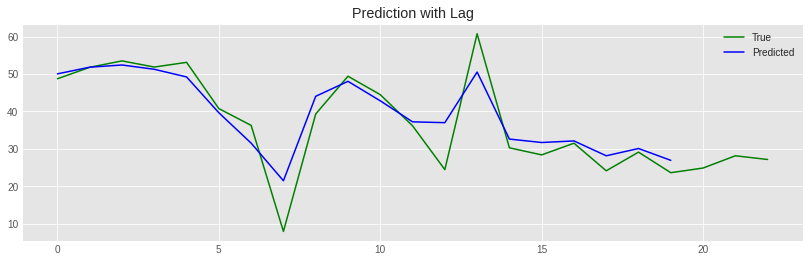

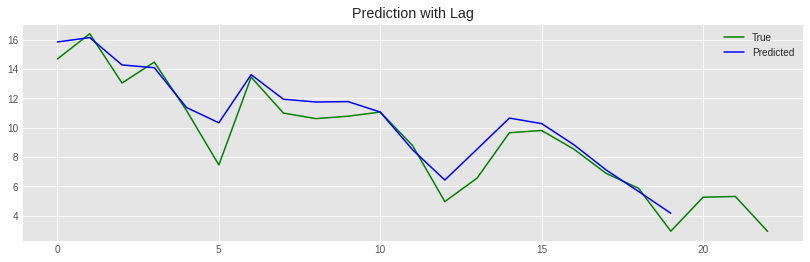

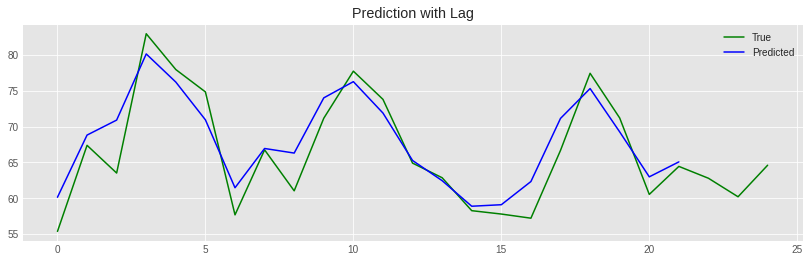

In [28]:
total_error["LSTM"]["Cases"] = 0
for country in training_countries:
  total_error["LSTM"]["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 1.5138650872981894
MSE with Lag    : 0.006689143114685078
MSE with Lag    : 0.20125225331775198
MSE with Lag    : 0.1218260475508262
MSE with Lag    : 0.2038355231575806
MSE with Lag    : 0.5404083702214629


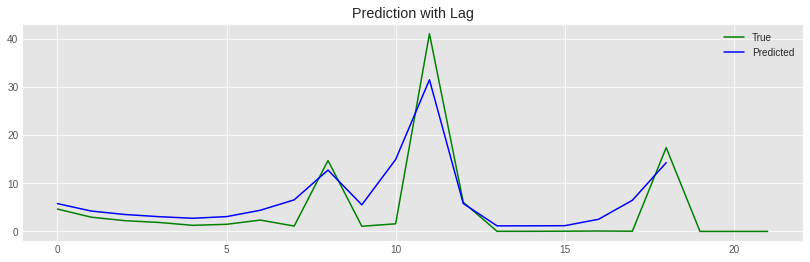

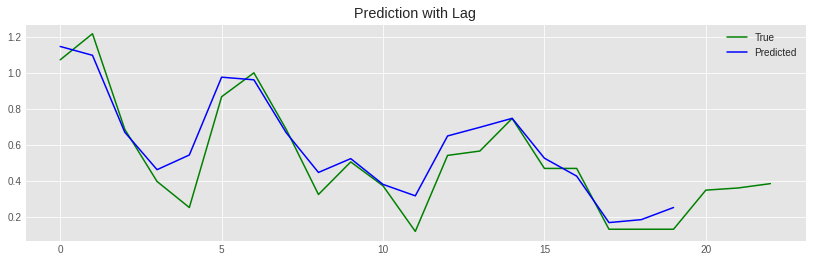

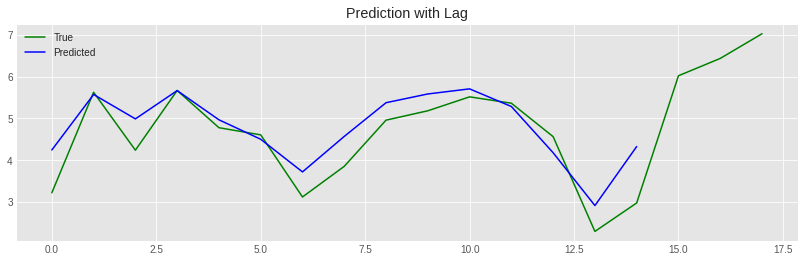

In [29]:
total_error["LSTM"]["Deaths"] = 0
for country in training_countries:
  total_error["LSTM"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [0]:
FILE = open('LSTMcases.pickle', 'wb')
pickle.dump(regressor_cases, FILE)
FILE.close()

FILE = open('LSTMdeaths.pickle', 'wb')
pickle.dump(regressor_deaths, FILE)
FILE.close()

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1147
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 2ms/step - loss: 0.0956
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 3ms/step - loss: 0.0724
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 3ms/step - loss: 0.1019
Fitting to United_States_of_America
Epoch 1/1
106/106 [==============================] - 0s 2ms/step - loss: 0.0768
Fitting to Brazil
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0562
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 3ms/step - loss: 0.0755
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 2ms/step - loss: 0.0841
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0568
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.0667
F

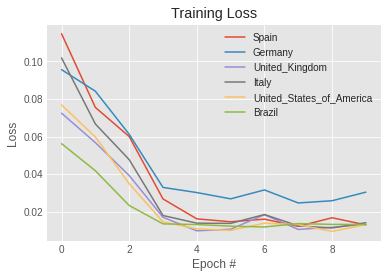

In [31]:
%%time
# epochs = 5
# The GRU architecture
regressorGRU_cases = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Second GRU layer
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Third GRU layer
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU_cases.add(GRU(units=50, activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# The output layer
regressorGRU_cases.add(Dense(units=1))
# Compiling the RNN
regressorGRU_cases.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorGRU_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1448
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 2ms/step - loss: 0.1067
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 2ms/step - loss: 0.1067
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 3ms/step - loss: 0.0863
Fitting to United_States_of_America
Epoch 1/1
106/106 [==============================] - 0s 3ms/step - loss: 0.0524
Fitting to Brazil
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0653
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 3ms/step - loss: 0.1112
Fitting to Germany
Epoch 1/1
101/101 [==============================] - 0s 3ms/step - loss: 0.0760
Fitting to United_Kingdom
Epoch 1/1
98/98 [==============================] - 0s 3ms/step - loss: 0.0898
Fitting to Italy
Epoch 1/1
98/98 [==============================] - 0s 3ms/step - loss: 0.0696
F

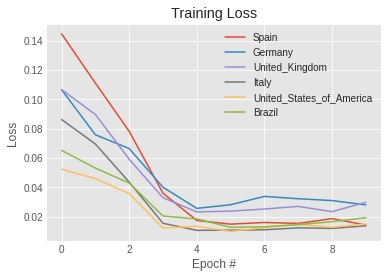

In [32]:
%%time
# epochs = 5
# The GRU architecture
regressorGRU_deaths = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Second GRU layer
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Third GRU layer
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU_deaths.add(GRU(units=50, activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# The output layer
regressorGRU_deaths.add(Dense(units=1))
# Compiling the RNN
regressorGRU_deaths.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorGRU_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressorGRU_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressorGRU_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 1.7690920296261001
MSE with Lag    : 1.9226920800388942
MSE with Lag    : 2.1386519831612683
MSE with Lag    : 0.8211478781202132
MSE with Lag    : 42.68890771441974
MSE with Lag    : 98.54576541011703


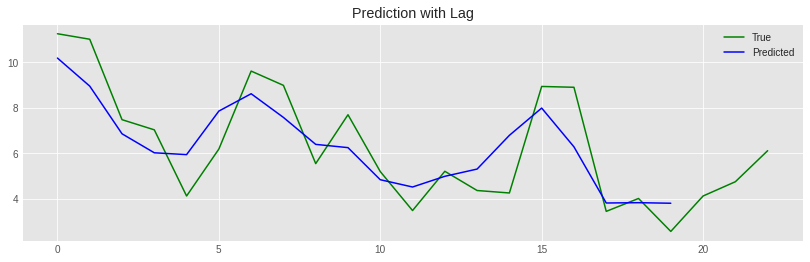

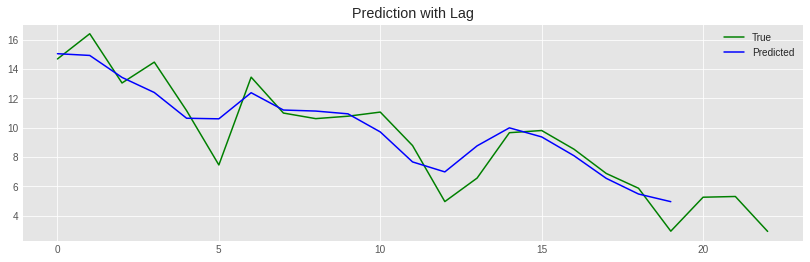

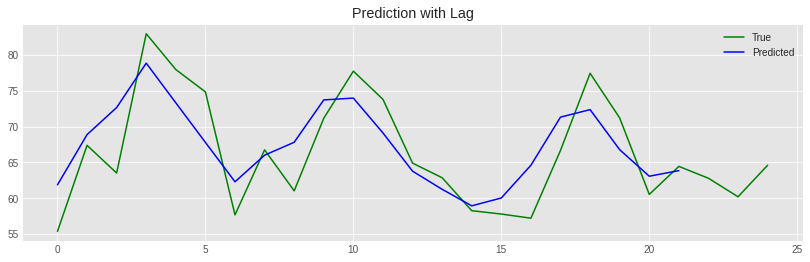

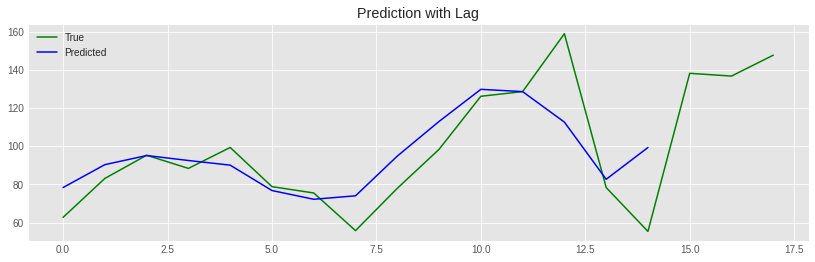

In [34]:
total_error["GRU"]["Cases"] = 0
for country in training_countries:
  total_error["GRU"]["Cases"] +=lagging(pred_result_cases[country], -3)

MSE with Lag    : 1.9931983586932063
MSE with Lag    : 0.04630681812505383
MSE with Lag    : 0.19612293311325094
MSE with Lag    : 0.4137472991378603
MSE with Lag    : 0.24333152498267227
MSE with Lag    : 0.620518482426593


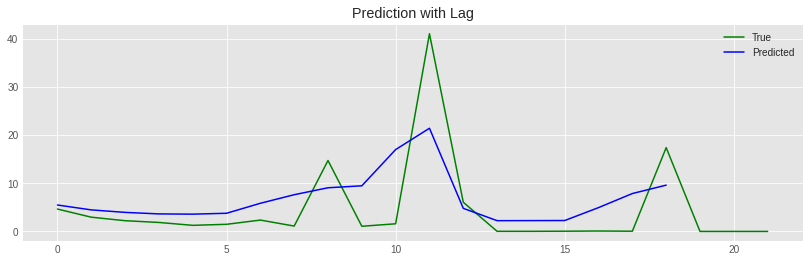

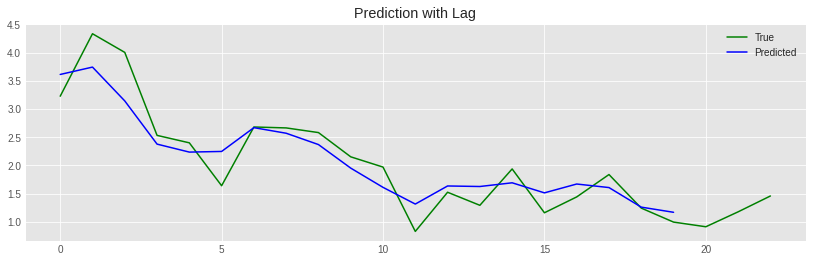

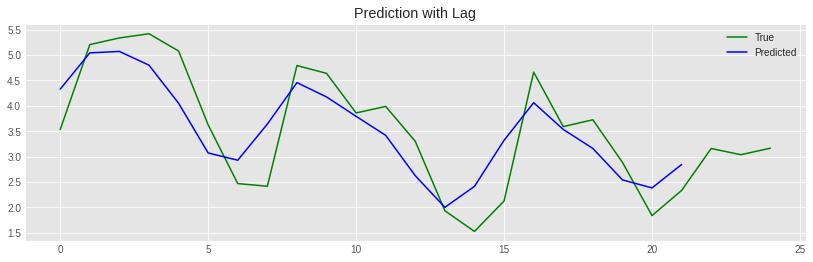

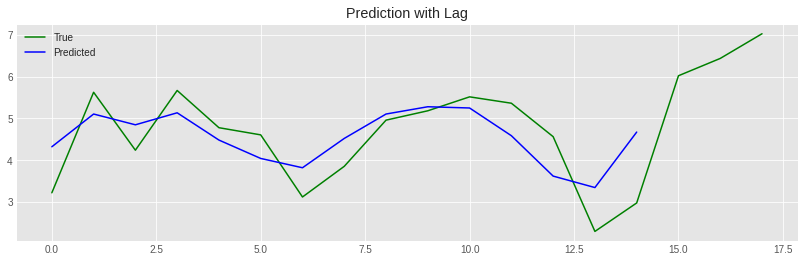

In [35]:
total_error["GRU"]["Deaths"] = 0
for country in training_countries:
  total_error["GRU"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [0]:
FILE = open('GRUcases.pickle', 'wb')
pickle.dump(regressorGRU_cases, FILE)
FILE.close()

FILE = open('GRUdeaths.pickle', 'wb')
pickle.dump(regressorGRU_deaths, FILE)
FILE.close()

In [37]:
for model_type in model_types:
  print("{0:5s}".format(model_type), total_error[model_type])

RNN   {'Cases': 264.72233537869806, 'Deaths': 1.8253611055143577}
LSTM  {'Cases': 131.69331277027152, 'Deaths': 2.5878764246604966}
GRU   {'Cases': 147.88625709548324, 'Deaths': 3.5132254164786367}
NODE  {'Cases': 0, 'Deaths': 0}


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 1
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = X_train
    trainset_cases[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = X_test
    testset_cases[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 1
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = X_train
    trainset_deaths[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = X_test
    testset_deaths[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR, MultiStepLR

In [0]:
def norm(dim):
    return nn.GroupNorm(min(32, dim), dim)
    
def zip_map(zipped, update_op):
    return [update_op(*elems) for elems in zipped]

def euler_update(h_list, dh_list, dt):
    return zip_map(zip(h_list, dh_list), lambda h, dh: h + dt * dh)

def euler_step(func, dt, state):
    return euler_update(state, func(state), dt)

def rk2_step(func, dt, state, **kwargs):
    k1 = func(state, **kwargs)
    k2 = func(euler_update(state, k1, dt), **kwargs)
    return zip_map(zip(state, k1, k2),
                   lambda h, dk1, dk2: h + dt * (dk1 + dk2) / 2)

def rk4_step(func, dt, state, **kwargs):
    k1 = func(state, **kwargs)
    k2 = func(euler_update(state, k1, dt / 2), **kwargs)
    k3 = func(euler_update(state, k2, dt / 2), **kwargs)
    k4 = func(euler_update(state, k3, dt), **kwargs)

    return zip_map(
        zip(state, k1, k2, k3, k4), lambda h, dk1, dk2, dk3, dk4: h + dt * ( dk1 + 2 * dk2 + 2 * dk3 + dk4) / 6,)
    
def forward_dynamics(state, nnet):
    t, y = state
    return [1.0, nnet(t, y)]

def backward_dynamics(state, nnet):
    with torch.set_grad_enabled(True):
        t, ht, at = state[0], state[1], state[2]
        ht = ht.detach()
        ht.requires_grad_(True)
        ht_new = nnet(t, ht)
        gradients = torch.autograd.grad(ht_new, [ht] + [w for w in nnet.parameters()], at, allow_unused=True, retain_graph=True)
    return [1.0, ht_new, *gradients]

class NeuralODEFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, nnet, solver, t, *params):
        delta_t = t[1:] - t[:-1]

        ctx.nnet = nnet
        ctx.solver = solver
        ctx.delta_t = delta_t

        state = [0, input]
        for dt in delta_t:
            state = solver(func=forward_dynamics, dt=float(dt), state=state, nnet=nnet)
        output = state[1]
        
        ctx.save_for_backward(input, output)
        return output

    @staticmethod
    def backward(ctx, output_gradients):
        input, output = ctx.saved_tensors
        nnet = ctx.nnet
        solver = ctx.solver
        delta_t = ctx.delta_t
        params = nnet.parameters()

        grad_weights = []
        for p in params:
            grad_weights.append(torch.zeros_like(p))

        state = [1, output, output_gradients, *grad_weights]

        for i, dt in enumerate(delta_t):
            state = solver(func=backward_dynamics, dt=float(dt), state=state, nnet=nnet)

        # input = state[1]
        grad_input = state[2]
        grad_weights = state[3:]
        return (grad_input, None, None, None, *grad_weights)

class NeuralODE(nn.Module):
    def __init__(self, model, solver=rk4_step, t=np.linspace(0,99,99)):
      super().__init__()
      self.t = t
      self.model = model
      self.solver = solver
      self.params = [w for w in model.parameters()]

    def forward(self, input):
      return NeuralODEFunction.apply(input, self.model, self.solver, self.t, *self.params)

class ODEfunc(nn.Module):
    def __init__(self, dim):
        super(ODEfunc, self).__init__()
        self.norm1 = norm(dim)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = ConcatConv2d(dim, dim, 3, 1, 1)
        self.norm2 = norm(dim)
        self.conv2 = ConcatConv2d(dim, dim, 3, 1, 1)
        self.norm3 = norm(dim)
        self.nfe = 0

    def forward(self, t, x):
        self.nfe += 1
        out = self.norm1(x)
        out = self.relu(out)
        out = self.conv1(t, out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(t, out)
        out = self.norm3(out)
        return out

class arguments:
  def __init__(self):
    self.batch_size=64
    self.test_batch_size=1000
    self.epochs=15
    self.lr=0.01
    self.gamma=0.7
    self.seed=1
    self.log_interval=5
    
args=arguments()

device = torch.device("cpu")

#kwargs = {'num_workers': 1, 'pin_memory': True}



In [0]:
for country in training_countries:
  for x_or_y in ["X","y"]:
    trainset_cases[country][x_or_y]=np.float32(trainset_cases[country][x_or_y])
    testset_cases[country][x_or_y]=np.float32(testset_cases[country][x_or_y])

    trainset_deaths[country][x_or_y]=np.float32(trainset_deaths[country][x_or_y])
    testset_deaths[country][x_or_y]=np.float32(testset_deaths[country][x_or_y])

In [0]:
trainset = dict()
testset = dict()
for country in training_countries:
  trainset_cases[country] = torch.utils.data.DataLoader((trainset_cases[country]["X"], trainset_cases[country]["y"]), batch_size=10, shuffle=False)
  testset_cases[country] = torch.utils.data.DataLoader((testset_cases[country]["X"], testset_cases[country]["y"]), batch_size=10, shuffle=False)
  trainset_deaths[country] = torch.utils.data.DataLoader((trainset_deaths[country]["X"], trainset_deaths[country]["y"]), batch_size=10, shuffle=False)
  testset_deaths[country] = torch.utils.data.DataLoader((testset_deaths[country]["X"], testset_deaths[country]["y"]), batch_size=10, shuffle=False)

In [0]:
#trying my own model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 256)
        self.fc5 = nn.Linear(256, 256)
        self.fc6 = nn.Linear(256, 128)
        self.fc7 = nn.Linear(128, 64)
        self.fc8 = nn.Linear(64, 64)
        self.fc9 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x


Train Epoch: 0
Spain                                         0.11570894718170166
Germany                                       0.10157393664121628
United_Kingdom                                0.20226728916168213
Italy                                         0.09464982151985168
United_States_of_America                      0.08241618424654007
Brazil                                        0.056341707706451416

Train Epoch: 1
Spain                                         0.08867919445037842
Germany                                       0.10477148741483688
United_Kingdom                                0.07806858420372009
Italy                                         0.11322163790464401
United_States_of_America                      0.0824509710073471
Brazil                                        0.05570495128631592

Train Epoch: 2
Spain                                         0.08272473514080048
Germany                                       0.09577592462301254
United_Kingdom              

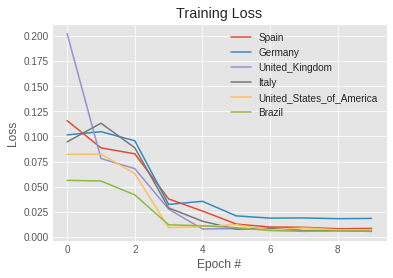

In [44]:
%%time
#normal NN training for fun
loss_function = nn.MSELoss()
history_NN_cases = {}
for country in training_countries:
  history_NN_cases[country] = []
model_NN_cases = Net().to(device)
optimizer = optim.Adam(model_NN_cases.parameters(), lr=0.01)
# epochs = 1500
for epoch in range(epochs): # 3 full passes over the data
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:  # `data` is a batch of data
        for (x,y) in enumerate(trainset_cases[country]):
            data = y[0]
            target = y[1]
            model_NN_cases.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
            output = model_NN_cases(data)  # pass in the reshaped batch (recall they are 28x28 atm)
            loss=loss_function(target,output)
            #loss = F.nll_loss(output, y)  # calc and grab the loss value
            loss.backward()  # apply this loss backwards thru the network's parameters
            optimizer.step()  # attempt to optimize weights to account for loss/gradients
        print("{0:45s}".format(country), loss.item())  # print loss. We hope loss (a measure of wrong-ness) declines! 
        history_NN_cases[country].append(loss.item())

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_NN_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


Train Epoch: 0
Spain                                         0.1508842557668686
Germany                                       0.08705417066812515
United_Kingdom                                0.18113556504249573
Italy                                         0.08520954847335815
United_States_of_America                      0.045485712587833405
Brazil                                        0.07004577666521072

Train Epoch: 1
Spain                                         0.11148254573345184
Germany                                       0.08854056894779205
United_Kingdom                                0.11360707134008408
Italy                                         0.09979341179132462
United_States_of_America                      0.04426146298646927
Brazil                                        0.06861913204193115

Train Epoch: 2
Spain                                         0.10398028790950775
Germany                                       0.08126106858253479
United_Kingdom              

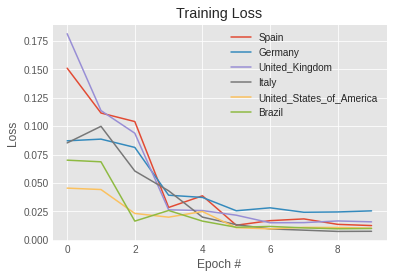

In [45]:
%%time
#normal NN training for fun
loss_function = nn.MSELoss()
history_NN_deaths = {}
for country in training_countries:
  history_NN_deaths[country] = []
model_NN_deaths = Net().to(device)
optimizer = optim.Adam(model_NN_deaths.parameters(), lr=0.01)
# epochs = 15
for epoch in range(epochs): # 3 full passes over the data
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:  # `data` is a batch of data
        for (x,y) in enumerate(trainset_deaths[country]):
            data = y[0]
            target = y[1]
            model_NN_deaths.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
            output = model_NN_deaths(data)  # pass in the reshaped batch (recall they are 28x28 atm)
            loss=loss_function(target,output)
            #loss = F.nll_loss(output, y)  # calc and grab the loss value
            loss.backward()  # apply this loss backwards thru the network's parameters
            optimizer.step()  # attempt to optimize weights to account for loss/gradients
        print("{0:45s}".format(country), loss.item())  # print loss. We hope loss (a measure of wrong-ness) declines! 
        history_NN_deaths[country].append(loss.item())

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_NN_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
def train(args, model, device, train_loader, optimizer, epoch, country_name, history_dict , op):
  model.train()
  batch_idx = 0
  for (x,y) in enumerate(train_loader):
    data = y[0]
    target = y[1]
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_function(output,target)
    loss.backward()
    optimizer.step()
    batch_idx += 1
    print("{0:45s}".format(country), loss.item())
    history_dict[country_name].append(loss.item())
    op[country_name]["Target"] = target.tolist()
    op[country_name]["Prediction"] = output.tolist()

def test(args, model, device, test_loader, country_name , op):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in enumerate(test_loader):
      data = target[0]
      target = target[1]
      data, target = data.to(device), target.to(device)
      output = model(data)
      loss = loss_function(output,target)
      test_loss += loss
      pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      op[country_name]["Target"] = target.tolist()
      op[country_name]["Prediction"] = output.tolist()
    return test_loss


Train Epoch: 0
Spain                                         0.13034722208976746
Germany                                       0.09632377326488495
United_Kingdom                                0.17641271650791168
Italy                                         0.08044089376926422
United_States_of_America                      0.07628841698169708
Brazil                                        0.056873079389333725

Train Epoch: 1
Spain                                         0.07940592616796494
Germany                                       0.09499386698007584
United_Kingdom                                0.0712212547659874
Italy                                         0.10043695569038391
United_States_of_America                      0.0782632827758789
Brazil                                        0.05512263998389244

Train Epoch: 2
Spain                                         0.08051488548517227
Germany                                       0.09537016600370407
United_Kingdom               

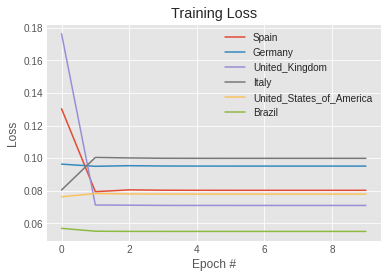

In [47]:
%%time
history_cases = {}
op_cases_train = {}
op_cases_test = {}
for country in training_countries:
  history_cases[country] = []
  op_cases_train[country] = {}
  op_cases_test[country] = {}
  for output_or_prediction in ["Target", "Prediction"]:
    op_cases_train[country][output_or_prediction] = []
    op_cases_test[country][output_or_prediction] = []
# [ADD SINLGE LINE] using NeuralODE to update this network.
model_cases = Net().to(device)
loss_function=nn.MSELoss()
# just train as usual, nothing need to change
optimizer = optim.Adam(model_cases.parameters(), lr = 0.01)

# epochs = 1
NODE_loss_cases = {}
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      train(args, model_cases, device, trainset_cases[country], optimizer, epoch, country, history_cases , op_cases_train)
      NODE_loss_cases[country] = test(args, model_cases, device, testset_cases[country], country, op_cases_test)
      scheduler.step()

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

/n/n
Spain


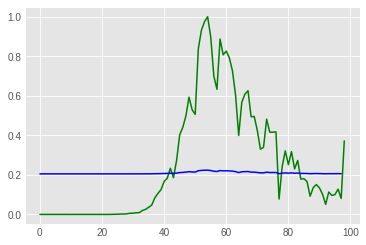

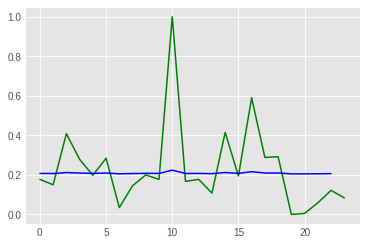

/n/n
Germany


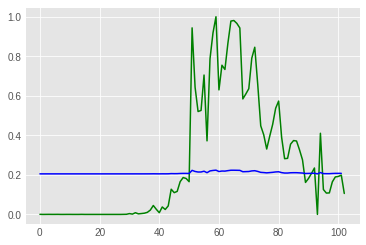

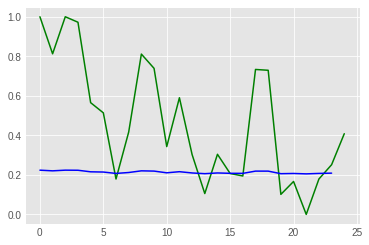

/n/n
United_Kingdom


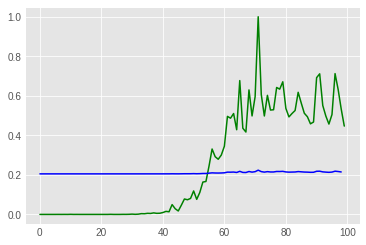

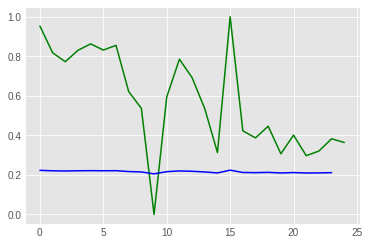

/n/n
Italy


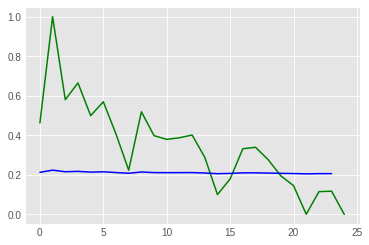

/n/n
United_States_of_America


/n/n
Brazil


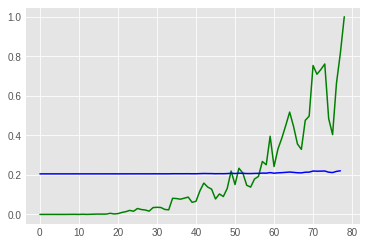

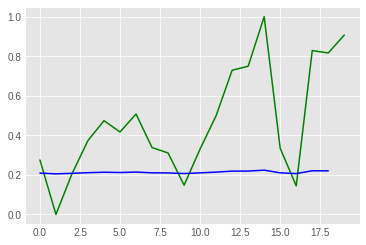

In [48]:
for country in training_countries:
  print("/n/n")
  print(country)
  plt.plot(op_cases_train[country]["Target"], color='green')
  plt.plot(op_cases_train[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()
  plt.plot(op_cases_test[country]["Target"], color='green')
  plt.plot(op_cases_test[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()


Train Epoch: 0
Spain                                         0.16349956393241882
Germany                                       0.09044920653104782
United_Kingdom                                0.12016723304986954
Italy                                         0.07951924204826355
United_States_of_America                      0.04966120794415474
Brazil                                        0.06704738736152649

Train Epoch: 1
Spain                                         0.10221526771783829
Germany                                       0.08364696800708771
United_Kingdom                                0.10590991377830505
Italy                                         0.09161129593849182
United_States_of_America                      0.04390837997198105
Brazil                                        0.06644867360591888

Train Epoch: 2
Spain                                         0.10046712309122086
Germany                                       0.08238338679075241
United_Kingdom              

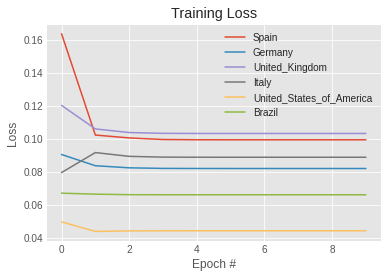

In [49]:
%%time
history_deaths = {}
op_deaths_train = {}
op_deaths_test={}
for country in training_countries:
  history_deaths[country] = []
  op_deaths_train[country] = {}
  op_deaths_test[country] = {}
  for output_or_prediction in ["Target", "Prediction"]:
    op_deaths_train[country][output_or_prediction] = []
    op_deaths_test[country][output_or_prediction] = []
# [ADD SINLGE LINE] using NeuralODE to update this network.
model_deaths = Net().to(device)
loss_function=nn.MSELoss()
# just train as usual, nothing need to change
optimizer = optim.Adam(model_deaths.parameters(), lr = 0.01)

NODE_loss_deaths = {}
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      train(args, model_deaths, device, trainset_deaths[country], optimizer, epoch, country, history_deaths , op_deaths_train)
      NODE_loss_deaths[country] = test(args, model_deaths, device, testset_deaths[country], country , op_deaths_test)
      scheduler.step()

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

/n/n
Spain


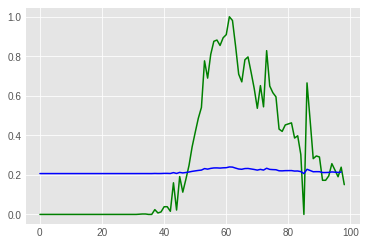

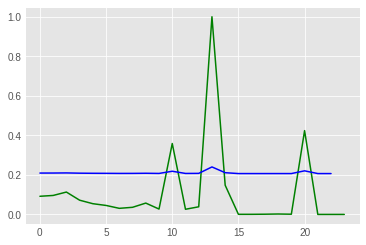

/n/n
Germany


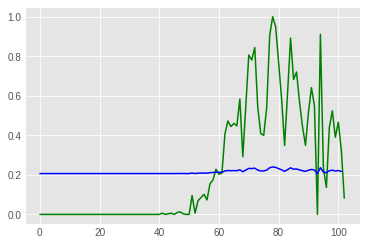

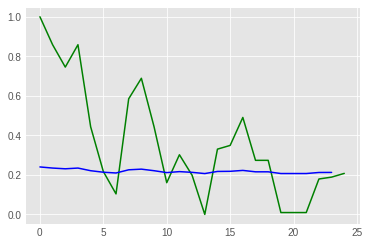

/n/n
United_Kingdom


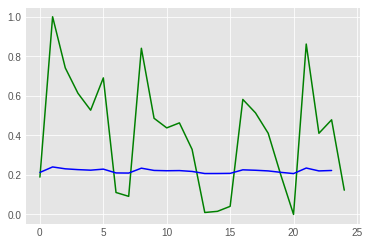

/n/n
Italy


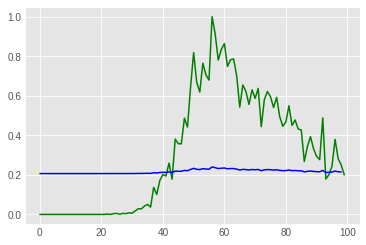

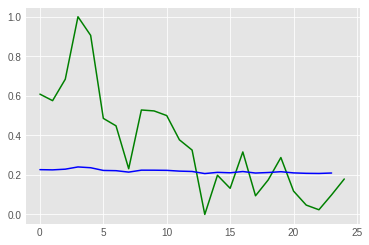

/n/n
United_States_of_America


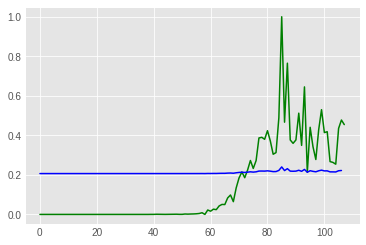

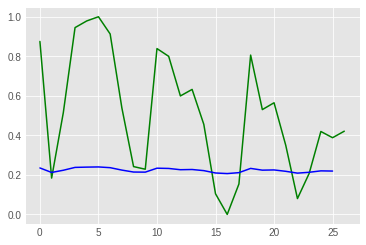

/n/n
Brazil


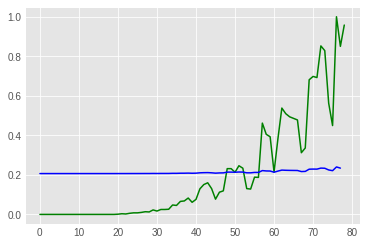

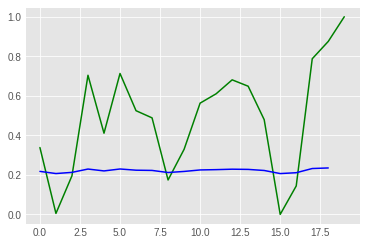

In [50]:
for country in training_countries:
  print("/n/n")
  print(country)
  plt.plot(op_deaths_train[country]["Target"], color='green')
  plt.plot(op_deaths_train[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()
  plt.plot(op_deaths_test[country]["Target"], color='green')
  plt.plot(op_deaths_test[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()

In [0]:
torch.save(model_cases.state_dict(), 'NODEcases.pth.tar')
torch.save(model_deaths.state_dict(), 'NODEdeaths.pth.tar')

In [0]:
total_error["NODE"]["Cases"] = 0
total_error["NODE"]["Deaths"] = 0
for country in training_countries:
  total_error["NODE"]["Cases"] += NODE_loss_cases[country]
  total_error["NODE"]["Deaths"] += NODE_loss_deaths[country]

In [53]:
for model_type in model_types:
  print("{0:5s}".format(model_type), total_error[model_type])

RNN   {'Cases': 264.72233537869806, 'Deaths': 1.8253611055143577}
LSTM  {'Cases': 131.69331277027152, 'Deaths': 2.5878764246604966}
GRU   {'Cases': 147.88625709548324, 'Deaths': 3.5132254164786367}
NODE  {'Cases': tensor(0.7053), 'Deaths': tensor(0.6616)}


In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
df_latest = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data.csv')
df_latest.head()

dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
0  12-06-2020   12      6  ...                   AFG   37172386.0          Asia
1  11-06-2020   11      6  ...                   AFG   37172386.0          Asia
2  10-06-2020   10      6  ...                   AFG   37172386.0          Asia
3  09-06-2020    9      6  ...                   AFG   37172386.0          Asia
4  08-06-2020    8      6  ...                   AFG   37172386.0          Asia

[5 rows x 11 columns]

In [0]:
FILE = open('RNNcases.pickle', 'rb')
RNN_cases = pickle.load(FILE)
FILE.close()

FILE = open('RNNdeaths.pickle', 'rb')
RNN_deaths = pickle.load(FILE)
FILE.close()

In [0]:
FILE = open('LSTMcases.pickle', 'rb')
LSTM_cases = pickle.load(FILE)
FILE.close()

FILE = open('LSTMdeaths.pickle', 'rb')
LSTM_deaths = pickle.load(FILE)
FILE.close()

In [0]:
FILE = open('GRUcases.pickle', 'rb')
GRU_cases = pickle.load(FILE)
FILE.close()

FILE = open('GRUdeaths.pickle', 'rb')
GRU_deaths = pickle.load(FILE)
FILE.close()

In [59]:
NODE_cases = Net().to(device)
FILE = torch.load('NODEcases.pth.tar')
NODE_cases.load_state_dict(FILE)

NODE_deaths = Net().to(device)
FILE = torch.load('NODEdeaths.pth.tar')
NODE_deaths.load_state_dict(FILE)

<All keys matched successfully>

In [0]:
grouped=df_latest.groupby('countriesAndTerritories')
countries=sorted(list(set(df_latest.countriesAndTerritories.unique())))
country_population = {}
for country in countries:
  country_population[country]=set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]

In [0]:
country_wise_cases=dict()
country_wise_deaths=dict()
normalised_country_wise_cases=dict()
normalised_country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break

In [0]:
for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1_000_000 / country_population[country]

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1_000_000 / country_population[country]

In [0]:
cumulative_country_wise_cases=dict()
cumulative_country_wise_deaths=dict()
normalised_cumulative_country_wise_cases=dict()
normalised_cumulative_country_wise_deaths=dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  normalised_cumulative_country_wise_cases[country] = []
  normalised_cumulative_country_wise_deaths[country] = []
  normalised_cumulative_cases = 0
  normalised_cumulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)
    normalised_cumulative_cases += normalised_country_wise_cases[country][index]
    normalised_cumulative_death += normalised_country_wise_deaths[country][index]
    normalised_cumulative_country_wise_cases[country].append(normalised_cumulative_cases)
    normalised_cumulative_country_wise_deaths[country].append(normalised_cumulative_death)

In [64]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cumulative_country_wise_cases[country][-1]),"{0:10d}".format(cumulative_country_wise_deaths[country][-1]))

Afghanistan                                        22890        426
Albania                                             1385         35
Algeria                                            10589        741
Andorra                                              852         51
Angola                                               118          5
Antigua_and_Barbuda                                   26          3
Argentina                                          27360        765
Armenia                                            14669        245
Aruba                                                101          3
Australia                                           7285        102
Austria                                            16964        674
Azerbaijan                                          8882        108
Bahamas                                              103         11
Bahrain                                            17269         36
Bangladesh                                      

In [65]:
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country,cumm_cases in zip(cummulative_country_wise_cases.keys(),cummulative_country_wise_cases.values()):
  countries_and_cases.append([country,cumm_cases[-1]])
countries_and_cases=sorted(countries_and_cases,key=lambda x:x[1],reverse=True)
top_n_cases=list(map(lambda x:x[0],countries_and_cases))[:top_n]


for country,cumm_deaths in zip(cummulative_country_wise_deaths.keys(),cummulative_country_wise_deaths.values()):
  countries_and_deaths.append([country,cumm_deaths[-1]])
countries_and_deaths=sorted(countries_and_deaths,key=lambda x:x[1],reverse=True)

top_n_deaths=list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index]))


def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
training_countries = list(intersection(top_n_cases, top_n_deaths))
print(training_countries)

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
United_Kingdom                                Italy                                        
Spain                                         Spain                                        
Italy                                         France                                       
India                                         Mexico                                       
Germany                                       Belgium                                      
Peru                                          Germany                                      
Turkey                                        Iran                             

In [0]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths
# base_data_cases = country_wise_cases
# base_data_deaths = country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_cases[country]["Train"])
    a1 = np.array(data_cases[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_cases[country] = sc.fit_transform(a0)
    transform_test_cases[country] = sc.fit_transform(a1)
    scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_deaths[country]["Train"])
    a1 = np.array(data_deaths[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_deaths[country] = sc.fit_transform(a0)
    transform_test_deaths[country] = sc.fit_transform(a1)
    scaler_deaths[country] = sc
del a0
del a1

In [67]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

Spain (105, 1)
Germany (109, 1)
United_Kingdom (107, 1)
Italy (107, 1)
United_States_of_America (115, 1)
Brazil (86, 1)


Spain (27, 1)
Germany (28, 1)
United_Kingdom (27, 1)
Italy (27, 1)
United_States_of_America (29, 1)
Brazil (22, 1)


Spain (105, 1)
Germany (109, 1)
United_Kingdom (107, 1)
Italy (107, 1)
United_States_of_America (115, 1)
Brazil (86, 1)


Spain (27, 1)
Germany (28, 1)
United_Kingdom (27, 1)
Italy (27, 1)
United_States_of_America (29, 1)
Brazil (22, 1)


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_deaths[country]["y"] = y_test

In [0]:
for country in training_countries:
  normalised_country_wise_cases[country] = np.array(normalised_country_wise_cases[country])
  normalised_country_wise_deaths[country] = np.array(normalised_country_wise_deaths[country])

In [0]:
pred_result_cases = {}
for country in training_countries:
  y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
  y_pred = scaler_cases[country].inverse_transform(RNN_cases.predict(testset_cases[country]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result_cases[country] = {}
  pred_result_cases[country]["True"] = y_true
  pred_result_cases[country]["Pred"] = y_pred

pred_result_deaths = {}
for country in training_countries:
  y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
  y_pred = scaler_deaths[country].inverse_transform(RNN_deaths.predict(testset_deaths[country]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result_deaths[country] = {}
  pred_result_deaths[country]["True"] = y_true
  pred_result_deaths[country]["Pred"] = y_pred

MSE with Lag    : 47.616131766198095
MSE with Lag    : 1.548190823531541
MSE with Lag    : 148.84147902178793
MSE with Lag    : 0.5514580203860154
MSE with Lag    : 26.118310507747424
MSE with Lag    : 285.9176381857292


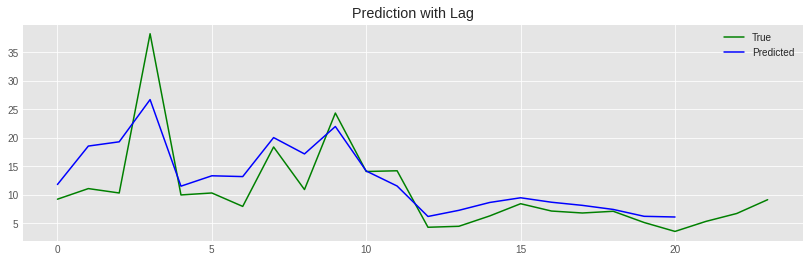

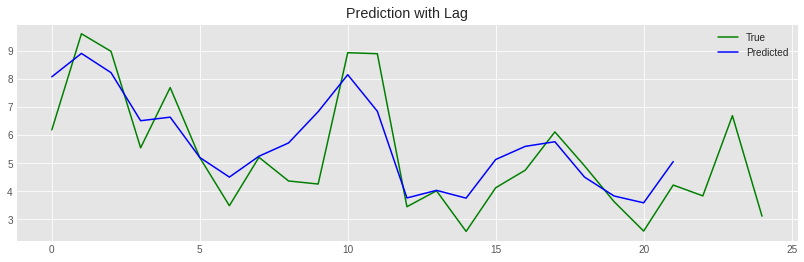

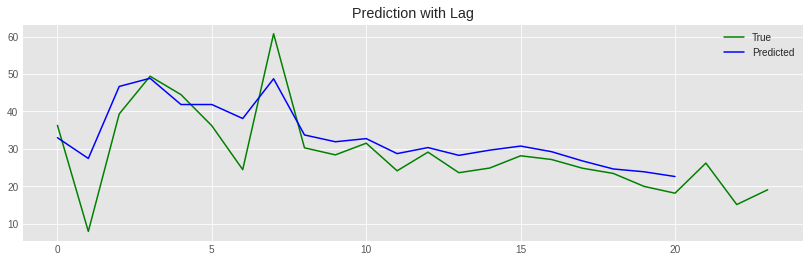

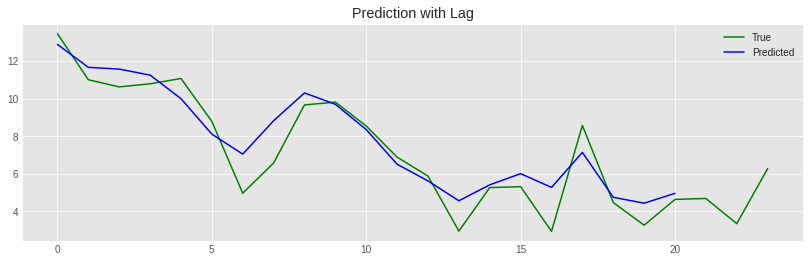

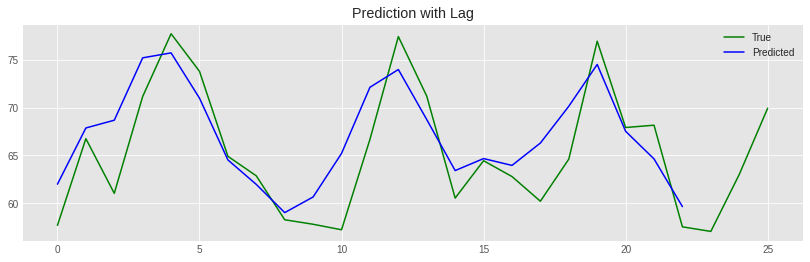

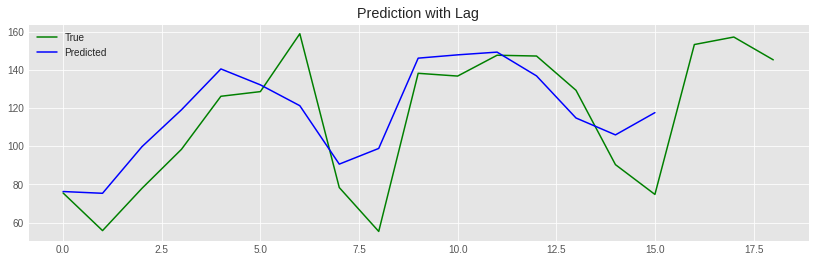

In [71]:
total_error["RNN"]["Cases"] = 0
for country in training_countries:
  total_error["RNN"]["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 13.322859964386117
MSE with Lag    : 0.02680873912069262
MSE with Lag    : 0.7640291848730993
MSE with Lag    : 0.038195642379775775
MSE with Lag    : 0.7319550426444265
MSE with Lag    : 0.463625814362004


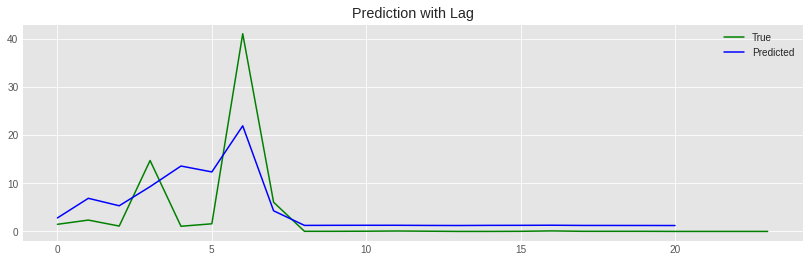

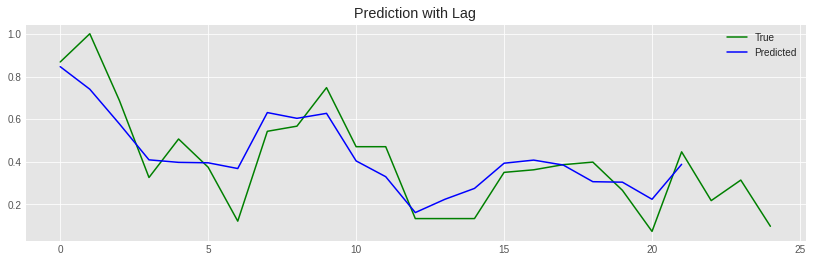

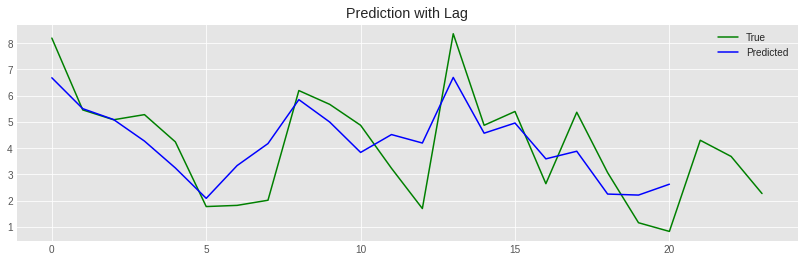

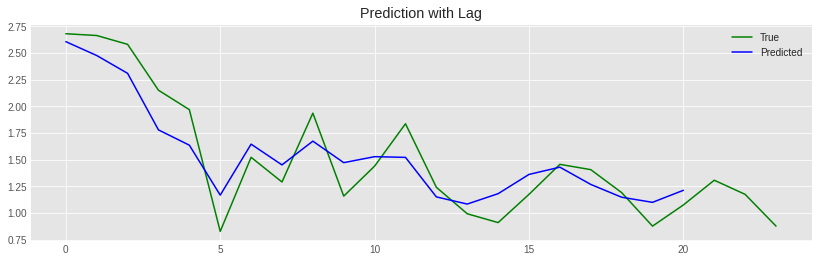

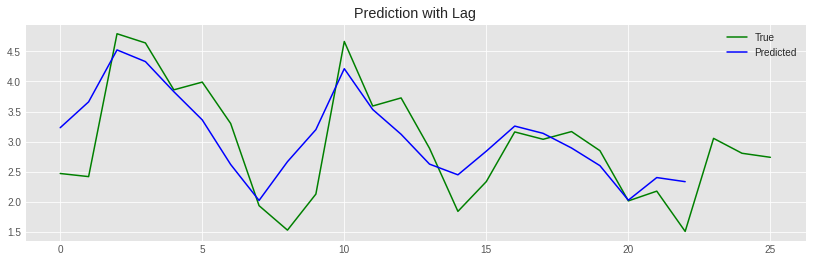

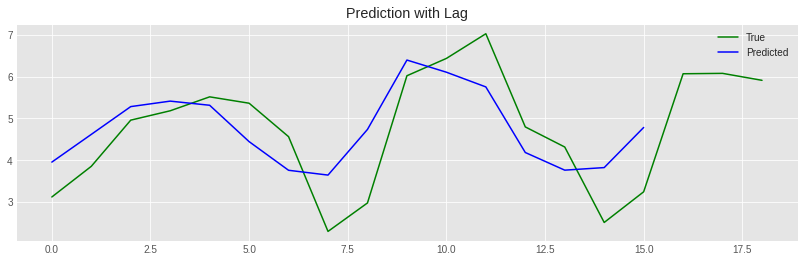

In [72]:
total_error["RNN"]["Deaths"] = 0
for country in training_countries:
  total_error["RNN"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [0]:
pred_result_cases = {}
for country in training_countries:
  y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
  y_pred = scaler_cases[country].inverse_transform(LSTM_cases.predict(testset_cases[country]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result_cases[country] = {}
  pred_result_cases[country]["True"] = y_true
  pred_result_cases[country]["Pred"] = y_pred

pred_result_deaths = {}
for country in training_countries:
  y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
  y_pred = scaler_deaths[country].inverse_transform(LSTM_deaths.predict(testset_deaths[country]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result_deaths[country] = {}
  pred_result_deaths[country]["True"] = y_true
  pred_result_deaths[country]["Pred"] = y_pred

MSE with Lag    : 32.914417583923694
MSE with Lag    : 0.9999617590165807
MSE with Lag    : 76.28717698047133
MSE with Lag    : 0.34868117049201247
MSE with Lag    : 13.051124518080812
MSE with Lag    : 112.83862964090254


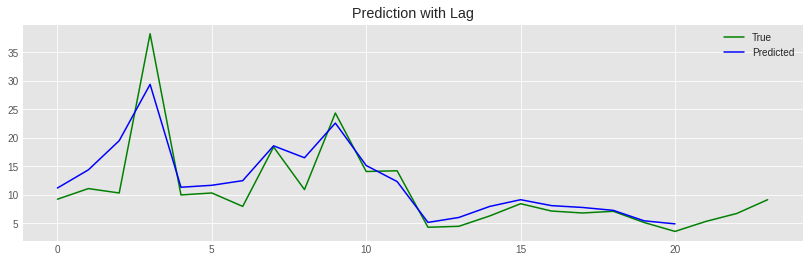

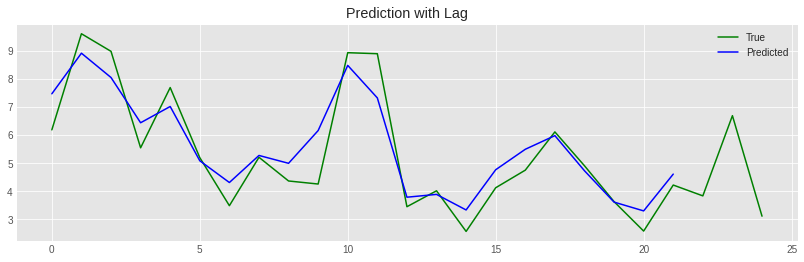

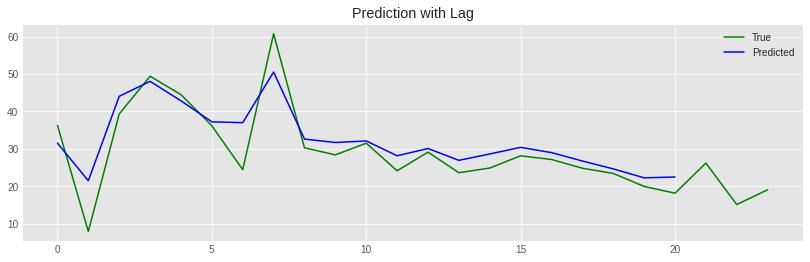

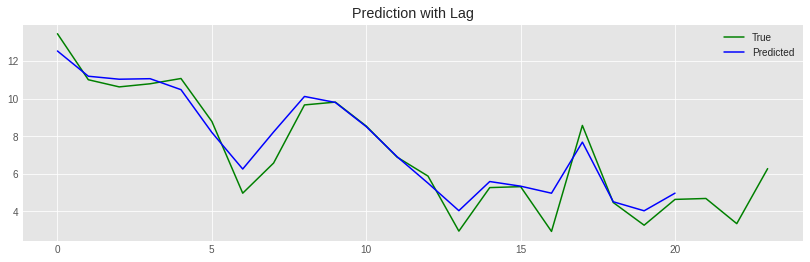

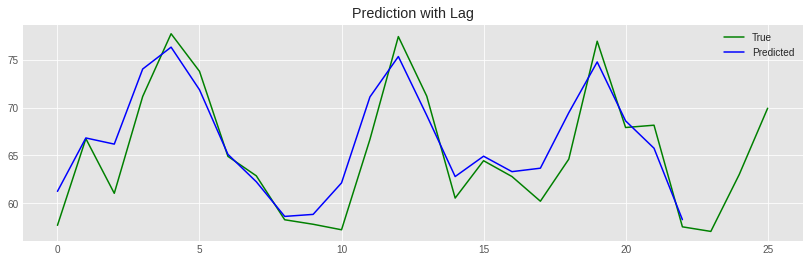

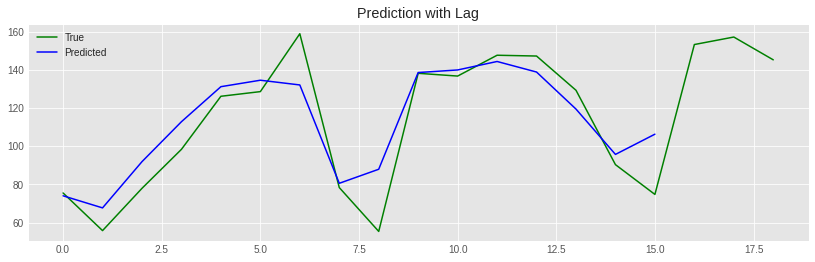

In [74]:
total_error["LSTM"]["Cases"] = 0
for country in training_countries:
  total_error["LSTM"]["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 12.109599384391984
MSE with Lag    : 0.004430960087671538
MSE with Lag    : 0.30222451015176693
MSE with Lag    : 0.004608783248829402
MSE with Lag    : 0.4149016226232883
MSE with Lag    : 0.3502443502368322


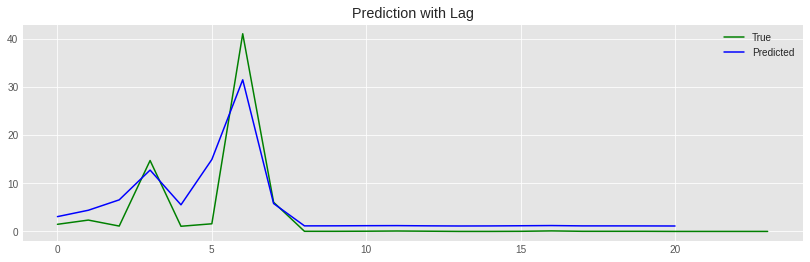

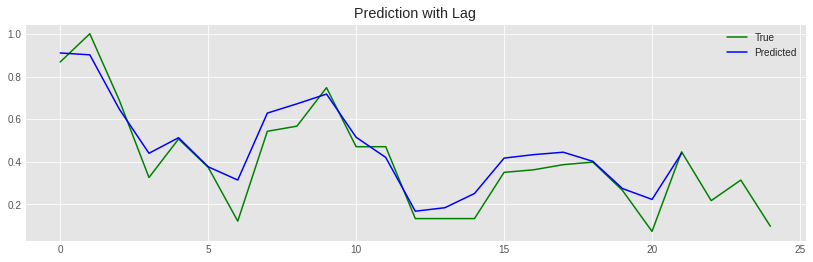

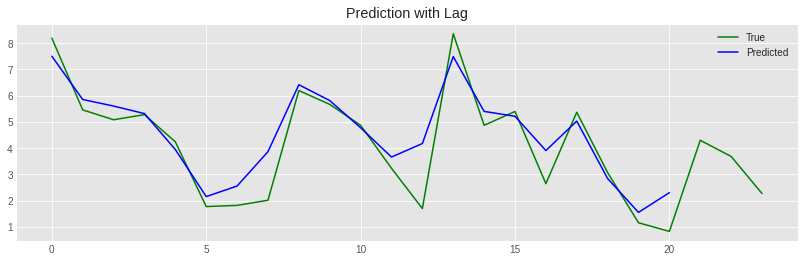

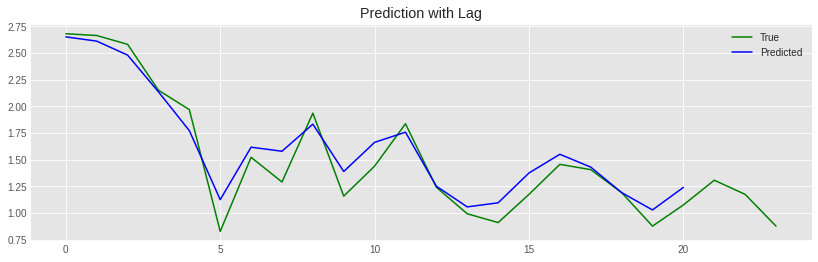

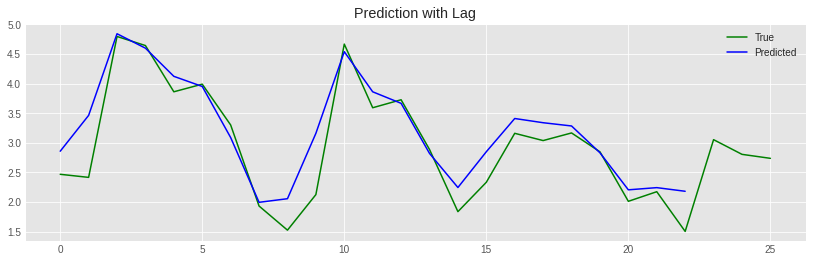

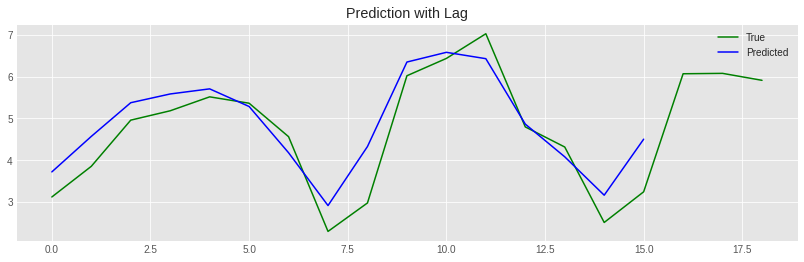

In [75]:
total_error["LSTM"]["Deaths"] = 0
for country in training_countries:
  total_error["LSTM"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [0]:
pred_result_cases = {}
for country in training_countries:
  y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
  y_pred = scaler_cases[country].inverse_transform(GRU_cases.predict(testset_cases[country]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result_cases[country] = {}
  pred_result_cases[country]["True"] = y_true
  pred_result_cases[country]["Pred"] = y_pred

pred_result_deaths = {}
for country in training_countries:
  y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
  y_pred = scaler_deaths[country].inverse_transform(GRU_deaths.predict(testset_deaths[country]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result_deaths[country] = {}
  pred_result_deaths[country]["True"] = y_true
  pred_result_deaths[country]["Pred"] = y_pred

MSE with Lag    : 44.32787718421864
MSE with Lag    : 1.9844352330180601
MSE with Lag    : 152.85570034144055
MSE with Lag    : 0.872124951127568
MSE with Lag    : 22.9090603731064
MSE with Lag    : 218.37389586847425


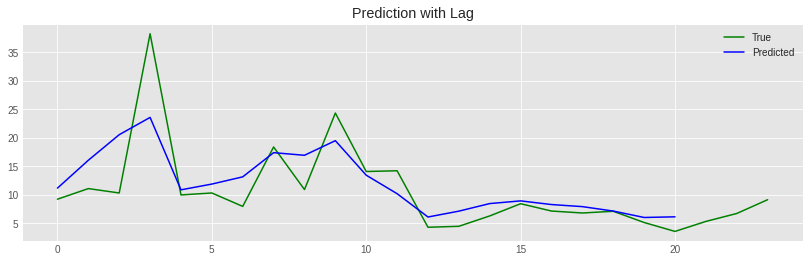

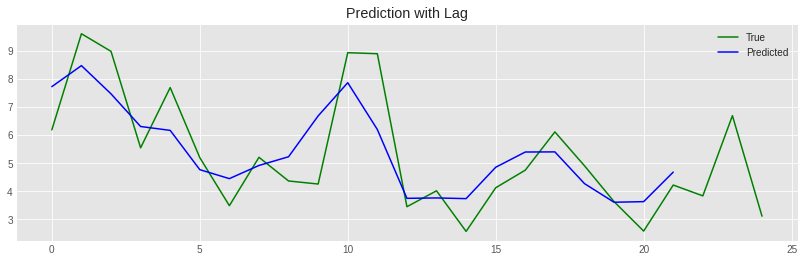

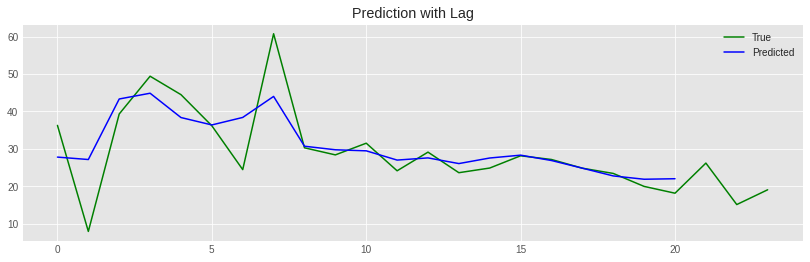

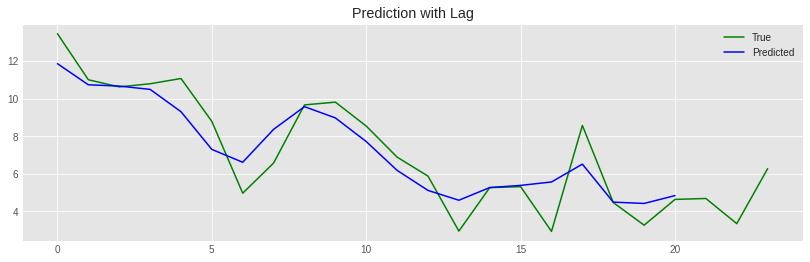

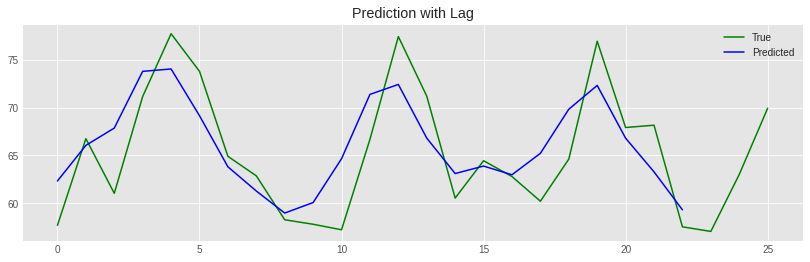

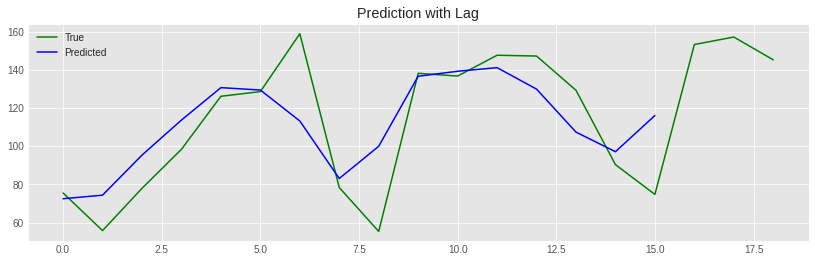

In [77]:
total_error["GRU"]["Cases"] = 0
for country in training_countries:
  total_error["GRU"]["Cases"] +=lagging(pred_result_cases[country], -3)

MSE with Lag    : 19.932905962072894
MSE with Lag    : 0.02976412444522224
MSE with Lag    : 1.0308168382929217
MSE with Lag    : 0.058211181807771274
MSE with Lag    : 0.6061241889267036
MSE with Lag    : 0.3201343192405867


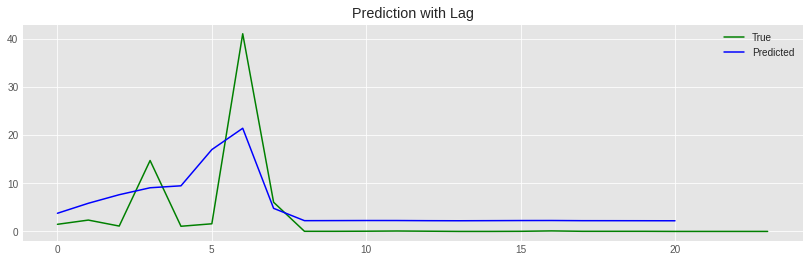

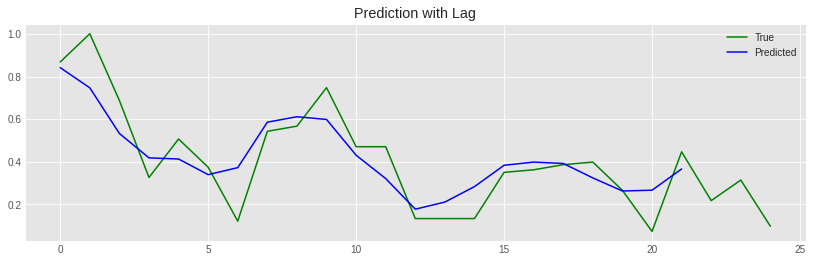

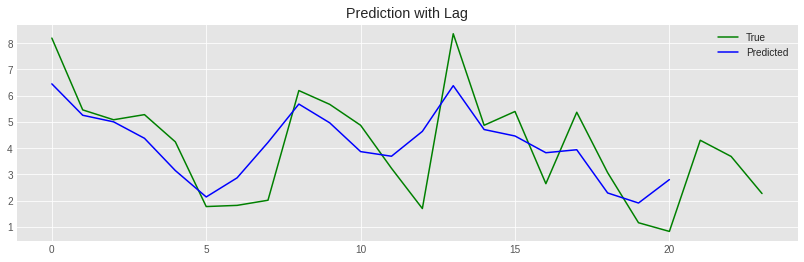

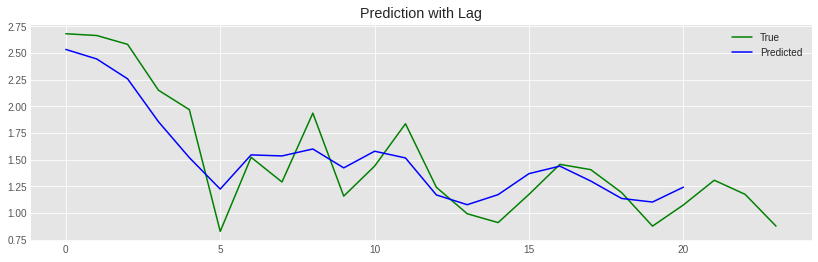

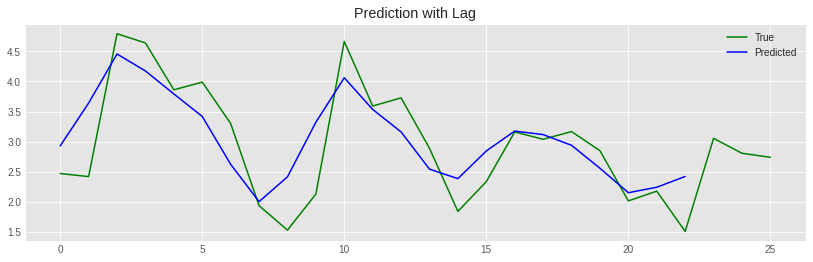

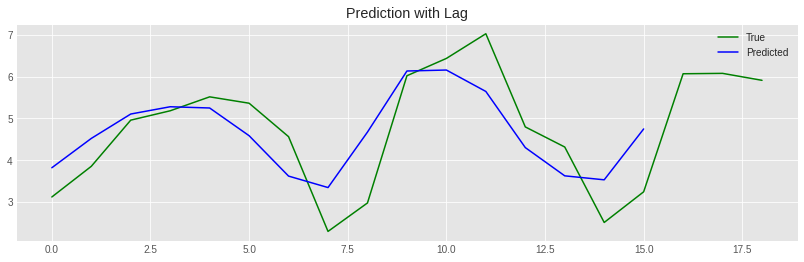

In [78]:
total_error["GRU"]["Deaths"] = 0
for country in training_countries:
  total_error["GRU"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 1
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = X_train
    trainset_cases[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = X_test
    testset_cases[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 1
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = X_train
    trainset_deaths[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = X_test
    testset_deaths[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

In [0]:
for country in training_countries:
  for x_or_y in ["X","y"]:
    trainset_cases[country][x_or_y]=np.float32(trainset_cases[country][x_or_y])
    testset_cases[country][x_or_y]=np.float32(testset_cases[country][x_or_y])

    trainset_deaths[country][x_or_y]=np.float32(trainset_deaths[country][x_or_y])
    testset_deaths[country][x_or_y]=np.float32(testset_deaths[country][x_or_y])

In [0]:
trainset = dict()
testset = dict()
for country in training_countries:
  trainset_cases[country] = torch.utils.data.DataLoader((trainset_cases[country]["X"], trainset_cases[country]["y"]), batch_size=10, shuffle=False)
  testset_cases[country] = torch.utils.data.DataLoader((testset_cases[country]["X"], testset_cases[country]["y"]), batch_size=10, shuffle=False)
  trainset_deaths[country] = torch.utils.data.DataLoader((trainset_deaths[country]["X"], trainset_deaths[country]["y"]), batch_size=10, shuffle=False)
  testset_deaths[country] = torch.utils.data.DataLoader((testset_deaths[country]["X"], testset_deaths[country]["y"]), batch_size=10, shuffle=False)




Spain


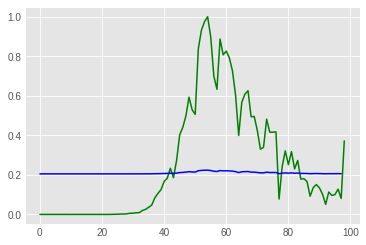

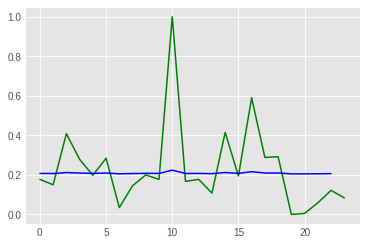




Germany


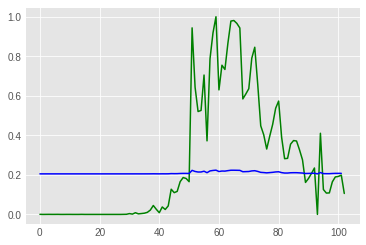

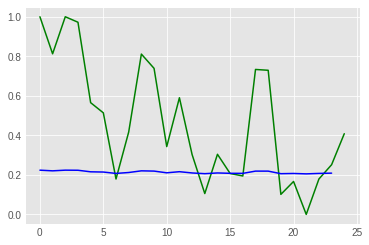




United_Kingdom


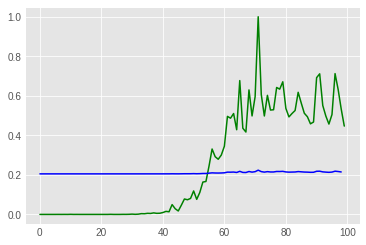

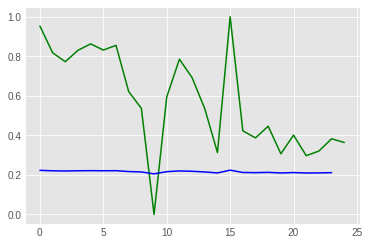




Italy


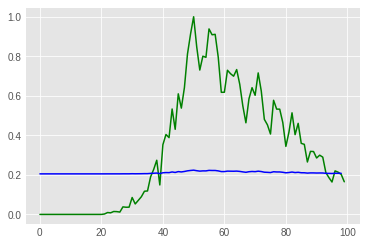

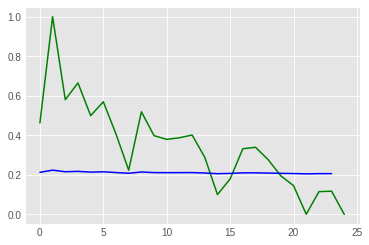




United_States_of_America


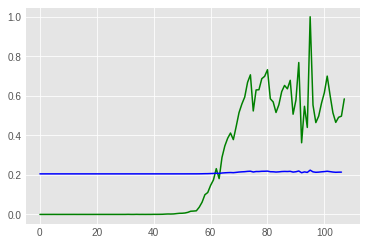

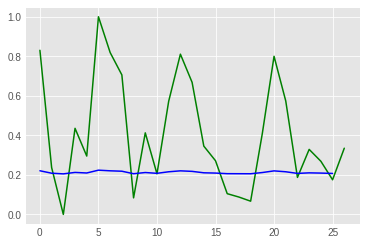




Brazil


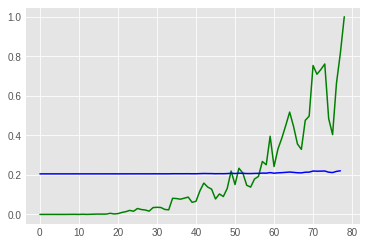

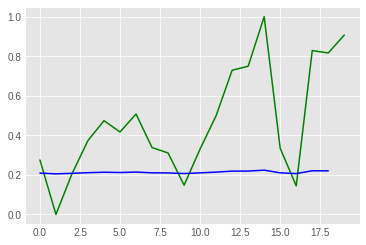

In [82]:
for country in training_countries:
  print("\n\n")
  print(country)
  plt.plot(op_cases_train[country]["Target"], color='green')
  plt.plot(op_cases_train[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()
  plt.plot(op_cases_test[country]["Target"], color='green')
  plt.plot(op_cases_test[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()